**Deber 02 - Fubdamentos de Inteligencia Artificial**  
Árbol de Decisiones

Fecha: 25/11/2023

In [7]:
# 1. Importación de librerías y lectura de datos

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

#Leer archivo
datos=pd.read_excel("./files/medicinas.xlsx")
#Muestra los datos
datos.head()
#Describe las características del datasheet
datos.describe()

#2. Borramos columna unamed
datos = datos.drop('Unnamed: 0', axis=1)
print(datos)

     Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    1   2            1   25.355     4
1     47    0   0            1   13.093     2
2     47    0   0            1   10.114     2
3     28    1   1            1    7.798     3
4     61    1   0            1   18.043     4
..   ...  ...  ..          ...      ...   ...
195   56    1   0            1   11.567     2
196   16    0   0            1   12.006     2
197   52    0   1            1    9.894     3
198   23    0   1            0   14.020     3
199   40    1   0            0   11.349     3

[200 rows x 6 columns]


In [8]:
# 3. Separamos los datos de entrada X con características y Y con etiquetas
x = datos.iloc[:,:-1] #Selecciona todas las columnas menos la última
y = datos.iloc[:,-1]

# 4. Obtenemos el conjunto de datos (75% entrenamiento y 25% prueba)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state= 25)

In [11]:
# 5. Construimos el modelo bajo el modelo de análisis "Árbol de Decisión"
modelo = DecisionTreeClassifier()

# 6. Entrenamos el modelo, probamos y obtenemos los datos
modelo.fit(x_train,y_train)
y_obtenido = modelo.predict(x_test)

In [12]:
# 7. Obtenemos las métricas de evaluación
#Accurancy Score
exactitud = accuracy_score(y_test, y_obtenido)
print(f"La excatitud obtenida es de: {exactitud}")

#Matriz de Confusión
matriz = confusion_matrix(y_test, y_obtenido)

La excatitud obtenida es de: 0.98


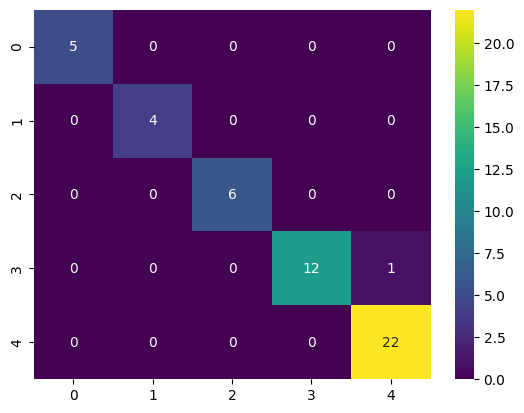

La matriz de confusión obtenida equivale a: [[ 5  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 12  1]
 [ 0  0  0  0 22]]


In [13]:
# 7.1 Dibujamos la matriz de confusión por medio de mapa de calor
import seaborn as sns

sns.heatmap(matriz, annot=True, fmt='d', cmap="viridis")
plt.show()

print(f"La matriz de confusión obtenida equivale a: {matriz}")


## Entrenamiento de nuevos modelos

Para el entrenamiento de los nuevos modelos, el órden de predicción será en base a los siguientes datos:
El conjunto de datos está en formato excel y contiene las siguientes columnas:

- age: edad del paciente

- sex: genero del paciente principal (0: masculino, 1: femenino)

- Blood Pressure Levels (BP): niveles de presión arterial (Bajo: 0, Normal: 1, Alto: 2)

- Cholesterol Levels: nivel de colesterol (Alto:1, Normal:0)

- Na to Potassium Ration: concentraciones de sodio y potasio en el cuerpo humano

- Drug: Tipos de medicamentos (0,1,2,3,4)


1. Hombre, 45 años, con presión arterial alta, colesterol normal y concentración de sodio y potasio de 12.

In [14]:
#Predicción 1
medicinas = modelo.predict([[45, 0, 2, 0, 12]])
print(f"\nEl tipo de medicamento para administrar al, o a la paciente, es: {medicinas}")


El tipo de medicamento para administrar al, o a la paciente, es: [0]


C:\Users\bryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


2. Mujer, 30 años, con presión arterial normal, colesterol normal y concentración de sodio y potasio de 30.

In [15]:
#Predicción 2
medicinas = modelo.predict([[30, 1, 1, 0, 30]])
print(f"\nEl tipo de medicamento para administrar al, o a la paciente, es: {medicinas}")


El tipo de medicamento para administrar al, o a la paciente, es: [4]


C:\Users\bryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


3. Mujer, 65 años, con presión arterial bajo, colesterol alto y concentración de sodio y potasio de 7.

In [16]:
#Predicción 3
medicinas = modelo.predict([[65, 1, 0, 1, 7]])
print(f"\nEl tipo de medicamento para administrar al, o a la paciente, es: {medicinas}")


El tipo de medicamento para administrar al, o a la paciente, es: [2]


C:\Users\bryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Importancia de datos

La importancia de datos se refiere a la influencia de los datos dentro del modelo predictivo; en sí, nos indica que datos van a ser determinantes en la obtención de un valor del resultado.

0.13944480309877338, Age
0.0, Sex
0.266593480392004, BP
0.10946753866449604, Cholesterol
0.4844941778447267, Na_to_K


<Axes: xlabel='BP', ylabel='Na_to_K'>

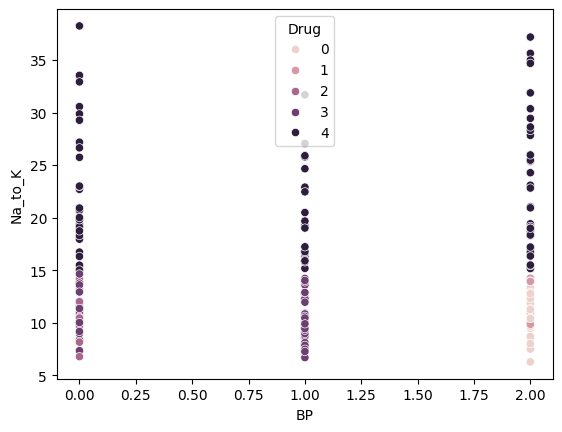

In [20]:
# 8. Caracteristicas e importancias - estas metricas solo para árbol de decisión
importancia = modelo.feature_importances_

# 9. Obtenemos los nombres de las características
nombres = datos.columns.tolist()

for nombre_carc, impt in zip(importancia, nombres):
    print(f'{nombre_carc}, {impt}')

# 10. Graficamos la relevancia de estos datos como un mapa de dispersión
sns.scatterplot(data=datos, x="BP", y="Na_to_K", hue="Drug")